In [1]:
# Disease Prediction Using Machine Learning (XGBoost, Deep Learning, ANN, Random Forest and SVM)
# Phase I
'''
 1. Data Fetching
 2. Data Cleaning
 3. Pre - Data Analysis
 4. Data Normalization 
'''
# Phase II 
'''
 1. Machine Learning Model Creation
 2. Data Splitting (Training and Testing Data)
 3. Training
 4. Pre-Testing
'''

# Phase III
'''
 1. Machine Learning Training Tune Up
 2. Machine Learning Testing
 3. K-Fold Validation Testing
 4. Voting Validation Testing
''' 

'\n 1. Machine Learning Training Tune Up\n 2. Machine Learning Testing\n 3. K-Fold Validation Testing\n 4. Voting Validation Testing\n'

In [50]:
# Import Library for Machine learning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import itertools
import keras_metrics
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers 
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, recall_score
from ucimlrepo import fetch_ucirepo
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# fetch dataset from the repository
heart_disease = fetch_ucirepo(id=45) 
  
# get data as pandas data frames which consist the main data and the label
X = heart_disease.data.features 
Y = heart_disease.data.targets 

In [3]:
# Elby Request ---> Change 2,3,4 into 1 (make it all 0 and 1)
Y.loc[Y.num != 0] = 1

#Join X and Y into one Data frame
df = pd.concat([X, Y], axis=1, join='inner')

/var/folders/v6/fjq39p8n3tgf4fp2pbww7ktr0000gn/T/ipykernel_6344/2718912325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[Y.num != 0] = 1


,num
0,0
1,1
2,1
3,0
4,0
...,...
298,1
299,1
300,1
301,1


In [5]:
# Checking Head (5 Data for Early Checking)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [13]:
# Check last 5 Data 
df.tail()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ekg,max_heart_rate,exercise_angina,oldpeak,slope,vessels_colored,thal,outcome
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [6]:
#Check Sum of Column and Rows 
df.shape

(303, 14)

In [14]:
# Data type of each of the header column
df.dtypes

age                      int64
sex                      int64
chest_pain               int64
rest_blood_pressure      int64
cholesterol              int64
fast_blood_sugar         int64
rest_ekg                 int64
max_heart_rate           int64
exercise_angina          int64
oldpeak                float64
slope                    int64
vessels_colored        float64
thal                   float64
outcome                  int64
dtype: object

## Data Cleaning

In [ ]:
#Checking Duplicate Data on the data set
df.duplicated().sum()

In [21]:
#Checking if there is Null or N.A Data in the Dataframe
df.isnull().sum()

age                    0
sex                    0
chest_pain             0
rest_blood_pressure    0
cholesterol            0
fast_blood_sugar       0
rest_ekg               0
max_heart_rate         0
exercise_angina        0
oldpeak                0
slope                  0
vessels_colored        4
thal                   2
outcome                0
dtype: int64

In [22]:
# Renaming the Header Columns
df = df.rename(columns = {'cp':'chest_pain',
                        'trestbps':'rest_blood_pressure',
                         'chol':'cholesterol',
                         'fbs':'fast_blood_sugar',
                         'restecg':'rest_ekg',
                         'thalach':'max_heart_rate',
                         'exang':'exercise_angina',
                         'ca':'vessels_colored',
                         'num':'outcome'}).copy()

In [28]:
# Remove NA Column from the main Data frame
df = df[['age', 'sex', 'chest_pain', 'rest_blood_pressure', 'cholesterol',
       'fast_blood_sugar', 'rest_ekg', 'max_heart_rate', 'exercise_angina',
       #'vessels_colored',th
    'outcome']].copy()

In [27]:
# Finding Null values in terms of percentage
total_null_values = df.isnull().sum()
na_columns=[]
for column, na_count in total_null_values.items():
    
    print(f'{column}: {round(na_count*100/920,2)}%')
    
    if (na_count*100/920)!=0:
        na_columns.append(column)

print(f'columns with N.A values are:{na_columns}')

age: 0.0%
sex: 0.0%
chest_pain: 0.0%
rest_blood_pressure: 0.0%
cholesterol: 0.0%
fast_blood_sugar: 0.0%
rest_ekg: 0.0%
max_heart_rate: 0.0%
exercise_angina: 0.0%
oldpeak: 0.0%
slope: 0.0%
vessels_colored: 0.43%
thal: 0.22%
outcome: 0.0%
columns with N.A values are:['vessels_colored', 'thal']


/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


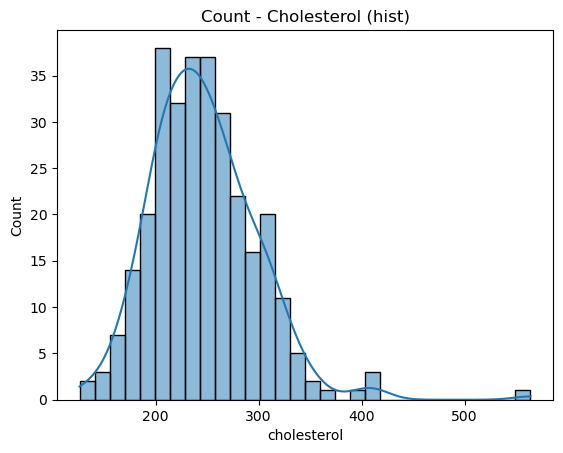

In [33]:
# Check Historgram and kernel density estimate (KDE) for data distribution
sns.histplot(df.cholesterol, bins = 30, kde = True)
plt.title('Count - Cholesterol (hist)')
plt.show()

/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


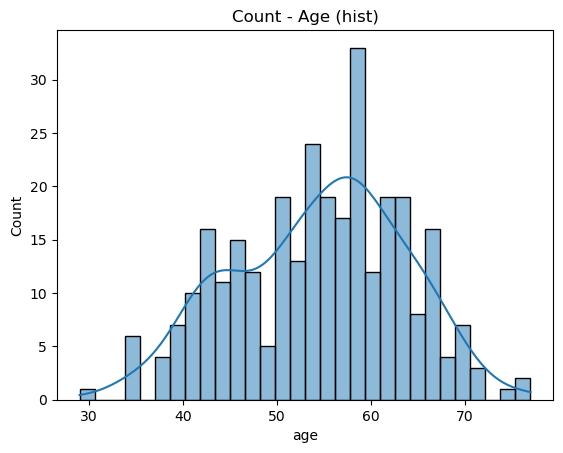

In [39]:
# Check Data Distribution or Density of
sns.histplot(df.age, bins = 30, kde = True)
plt.title('Count - Age (hist)')
plt.show()

/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


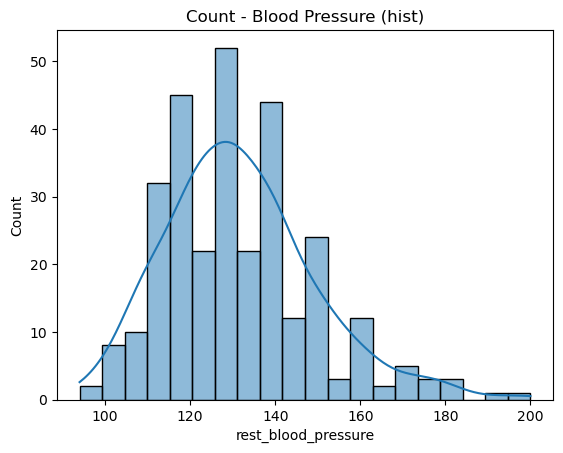

In [43]:
# Check Historgram and kernel density estimate (KDE) for data distribution
sns.histplot(df.rest_blood_pressure, bins = 20, kde = True)
plt.title('Count - Blood Pressure (hist)')
plt.show()

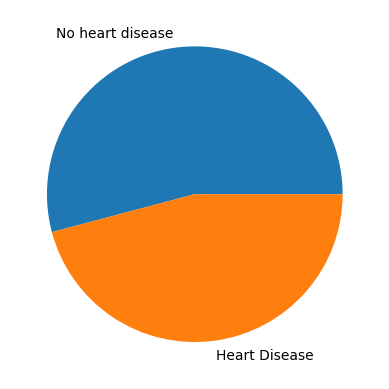

outcome
0    164
1    139
Name: count, dtype: int64

In [47]:
plt.pie(df['outcome'].value_counts(), labels = ['No heart disease','Heart Disease'])
plt.show()

df['outcome'].value_counts()

/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

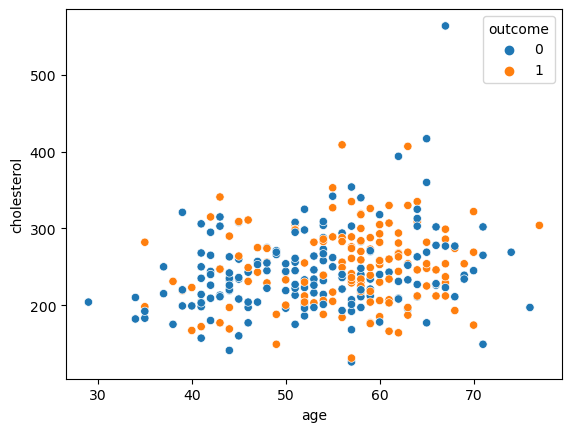

In [48]:
sns.scatterplot(data = df,
           x = 'age',
           y = 'cholesterol',
           hue = 'outcome')
plt.show()

/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

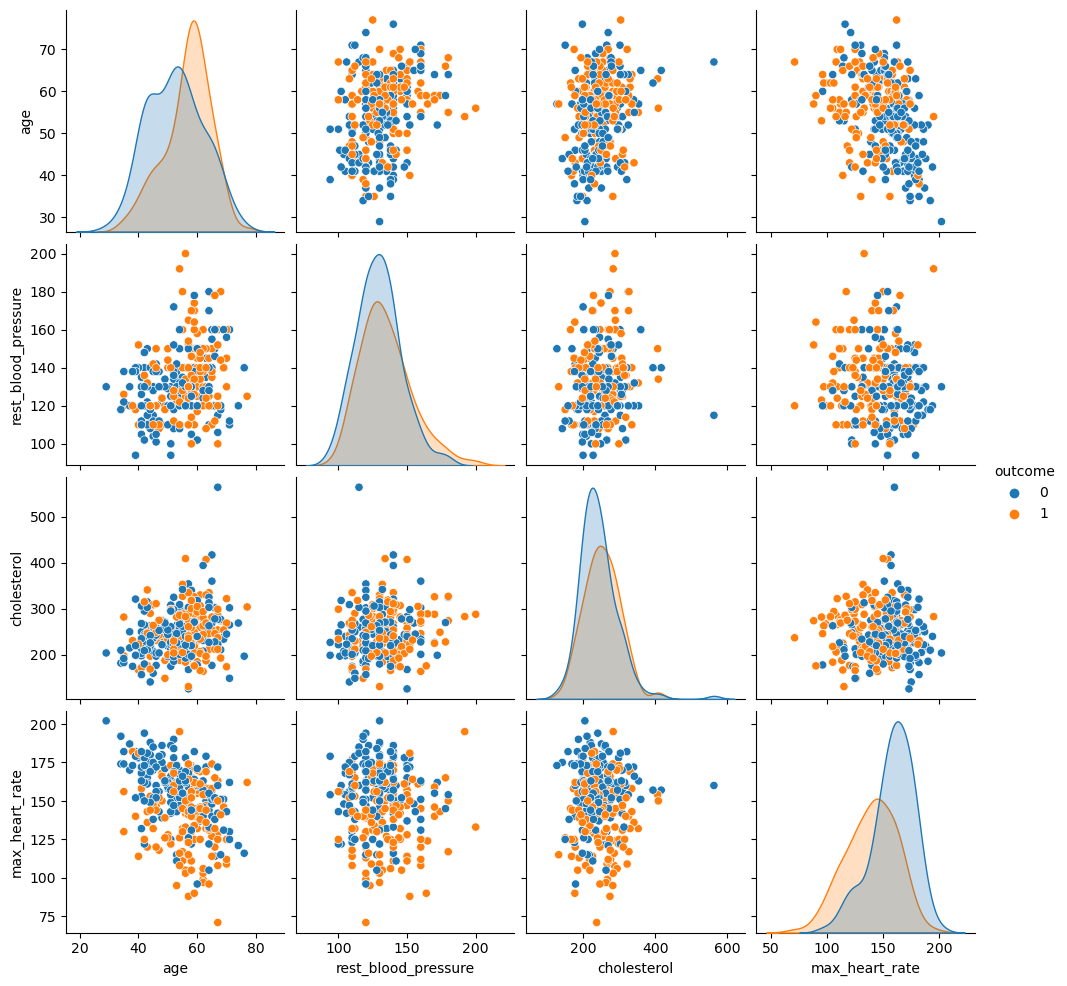

In [49]:
sns.pairplot(data = df,
             x_vars = ['age', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate'],
             y_vars = ['age', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate'],
            hue = 'outcome')
plt.show()

/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

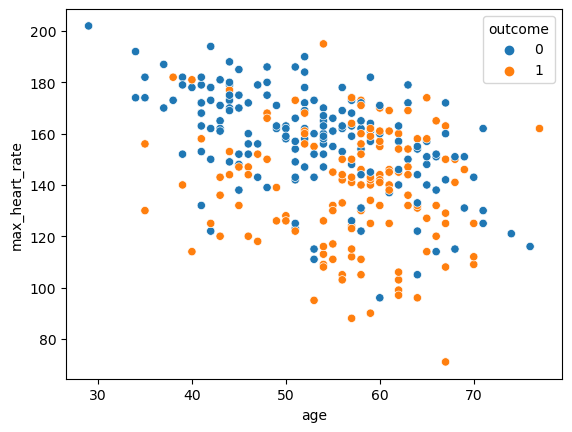

In [53]:
sns.scatterplot(data = df,
            x = 'age',
            y = 'max_heart_rate',
            hue = 'outcome')
plt.show()

/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iamrendra/opt/anaconda311/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


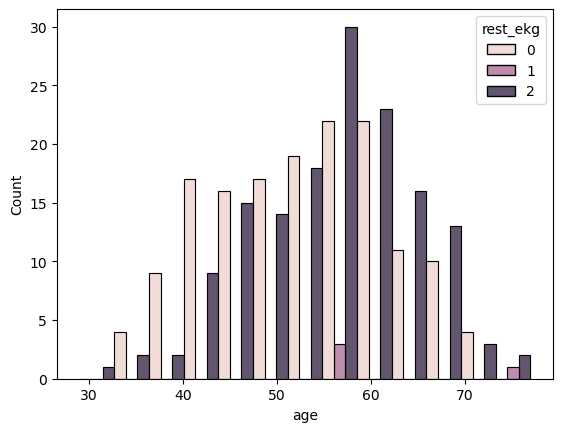

In [54]:
sns.histplot(x = df.age,
            hue = df.rest_ekg,
            multiple = 'dodge')
plt.show()

In [52]:
new_df = df.copy()
new_df['sex'] = new_df['sex'].replace('Female', 0).copy()
new_df['sex'] = new_df['sex'].replace('Male', 1).copy()
new_df

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ekg,max_heart_rate,exercise_angina,outcome
0,63,1,1,145,233,1,2,150,0,0
1,67,1,4,160,286,0,2,108,1,1
2,67,1,4,120,229,0,2,129,1,1
3,37,1,3,130,250,0,0,187,0,0
4,41,0,2,130,204,0,2,172,0,0
...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1
299,68,1,4,144,193,1,0,141,0,1
300,57,1,4,130,131,0,0,115,1,1
301,57,0,2,130,236,0,2,174,0,1


In [55]:
df_corr = new_df[['age', 'sex', 'rest_blood_pressure', 'cholesterol',
                      'fast_blood_sugar', 'max_heart_rate', 'outcome']].corr()

In [62]:
#Normalization of Data
all_data = df.drop(['outcome'], axis=1)

x = (all_data - np.min(all_data)) / (np.max(all_data) - np.min(all_data))
y = df['outcome']

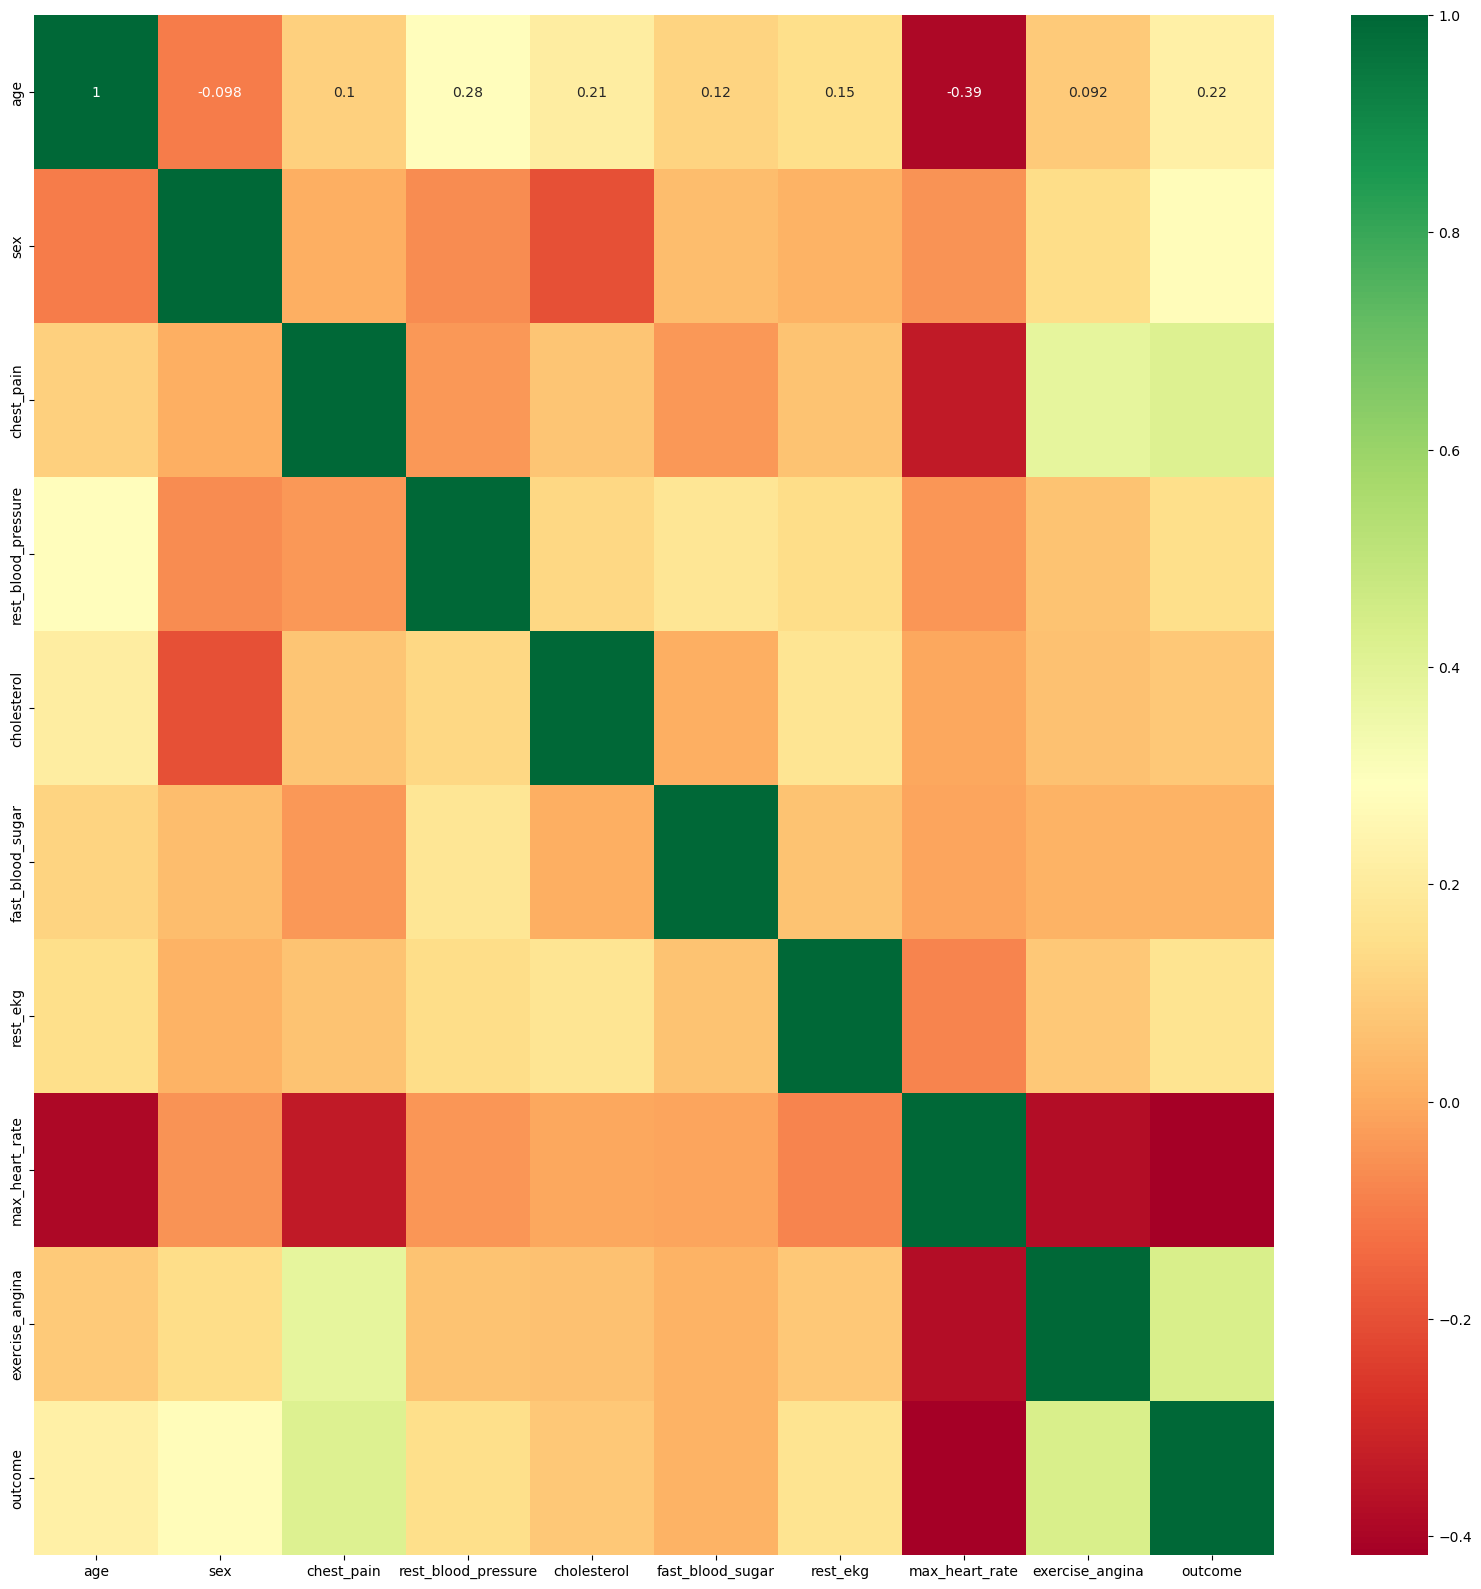

In [60]:
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data = df[top_corr_features].corr(),
           annot=True,cmap="RdYlGn")
plt.show()

In [15]:
#catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
#for item in catagorialList:
#    df[item] = df[item].astype('object')

In [16]:
#df = pd.get_dummies(df,drop_first=True,dtype=float)

In [17]:
#df.dtypes

# Machine Learning Section

## Splitting Data into Train and Test 

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [65]:
X_train

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ekg,max_heart_rate,exercise_angina
170,0.124113,0.001773,0.005319,0.283688,0.476950,0.000000,0.000000,0.198582,0.001773
192,0.076241,0.001773,0.007092,0.234043,0.437943,0.001773,0.003546,0.253546,0.001773
168,0.062057,0.001773,0.007092,0.223404,0.500000,0.000000,0.003546,0.276596,0.001773
42,0.125887,0.000000,0.003546,0.283688,0.535461,0.000000,0.000000,0.287234,0.000000
90,0.117021,0.001773,0.007092,0.212766,0.535461,0.000000,0.003546,0.267730,0.000000
...,...,...,...,...,...,...,...,...,...
203,0.113475,0.000000,0.005319,0.248227,0.554965,0.000000,0.000000,0.235816,0.000000
255,0.074468,0.000000,0.005319,0.212766,0.370567,0.000000,0.000000,0.306738,0.000000
72,0.109929,0.001773,0.007092,0.212766,0.473404,0.000000,0.000000,0.175532,0.001773
235,0.095745,0.001773,0.007092,0.216312,0.507092,0.000000,0.003546,0.205674,0.001773


## Random Forest

In [113]:
max_accuracy = 0

for xx in range(2000):
    rf = RandomForestClassifier(random_state=xx)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = xx

In [114]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [115]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 86.84 %


## SVM (Support Vector Machine)

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score

svc=SVC(kernel= 'rbf', gamma = 'scale' ,random_state=42)
svc.fit(X_train, Y_train)
svm_pred = svc.predict(X_test)

# storing recall_score for later comparision
svm_recall = round(recall_score(Y_test,svm_pred,average='weighted'),3)

print (classification_report(Y_test, svm_pred, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))
acc = accuracy_score(Y_test, svm_pred)
print ("SVM Accuracy")
print ("Accuracy: %.3f" % acc)

              precision    recall  f1-score   support

           0      0.636     0.854     0.729        41
           1      0.714     0.429     0.536        35

    accuracy                          0.658        76
   macro avg      0.675     0.641     0.632        76
weighted avg      0.672     0.658     0.640        76

SVM Accuracy
Accuracy: 0.658


In [74]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(Y_test, svm_pred, labels=svc.classes_)

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)

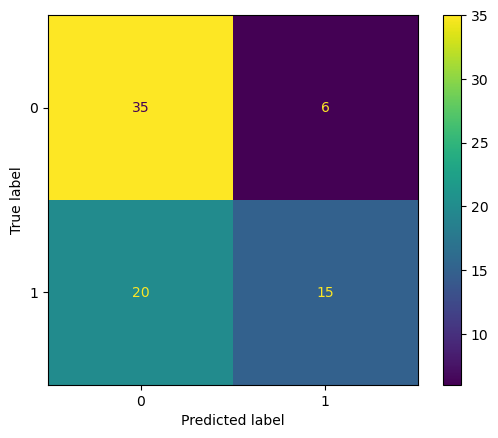

In [76]:
disp.plot()

gamma = 0.01  accuracy = 0.54   AUC = 0.77
gamma = 0.1  accuracy = 0.54   AUC = 0.78
gamma = 0.2  accuracy = 0.54   AUC = 0.77
gamma = 1  accuracy = 0.54   AUC = 0.77
gamma = scale  accuracy = 0.66   AUC = 0.77
gamma = auto  accuracy = 0.54   AUC = 0.77


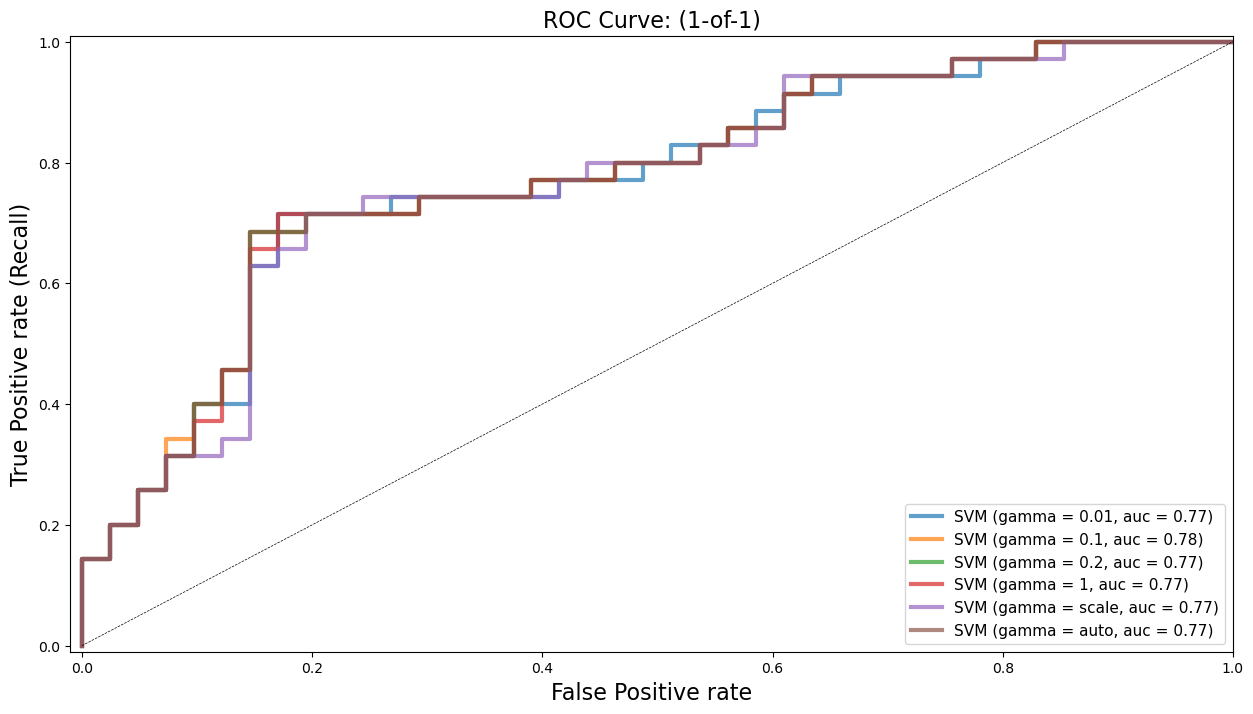

In [81]:
from matplotlib import cm
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (15,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1, 'scale', 'auto']:
    svm = SVC(gamma=g).fit(X_train, Y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(Y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, Y_test)
    print("gamma = {}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {}, auc = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive rate', fontsize=16)
plt.ylabel('True Positive rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC Curve: (1-of-1)', fontsize=16)

plt.show()

In [83]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X_train, Y_train,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

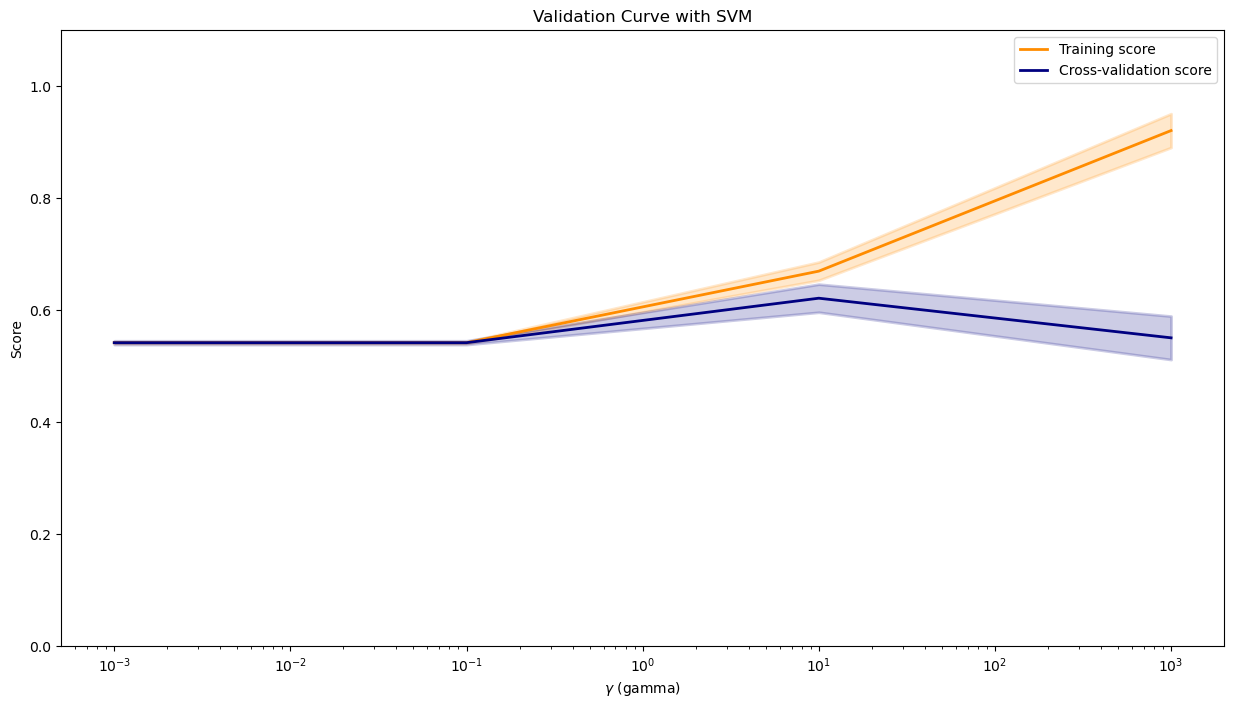

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## XGBoost


accuracy_score on train dataset :  1.0
              precision    recall  f1-score   support

           0      0.791     0.829     0.810        41
           1      0.788     0.743     0.765        35

    accuracy                          0.789        76
   macro avg      0.789     0.786     0.787        76
weighted avg      0.789     0.789     0.789        76

Accuracy: 0.789


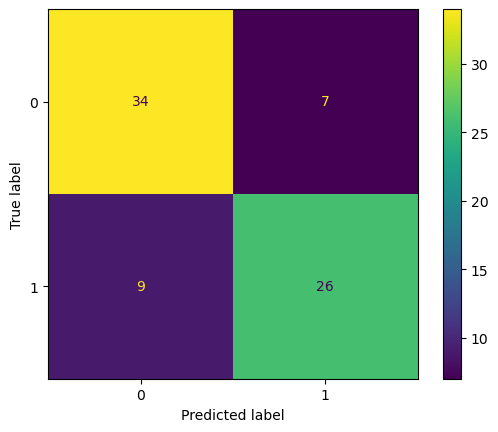

In [86]:
model = XGBClassifier()
 
# fit the model with the training data
model.fit(X_train,Y_train)
 
# Accuray Score on train dataset
predict_train = model.predict(X_train)
accuracy_train = accuracy_score(Y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
 
# predict the target on the test dataset
predict_test = model.predict(X_test)

xgb_recall = round(recall_score(Y_test, predict_test, average='weighted'),3)

print (classification_report(Y_test, predict_test, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))

# Accuracy Score on test dataset
accuracy_test = accuracy_score(Y_test,predict_test)
print ("Accuracy: %.3f" % accuracy_test)

# confusion matrix
cm = confusion_matrix(Y_test, predict_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()

## Neural Network

In [88]:
matplotlib.rcParams['font.family'] = "Times New Roman"

np.random.seed(306)  # for reproducibility
# network and training
NB_EPOCH = 200
BATCH_SIZE = 1024
VERBOSE = 0
NB_CLASSES = 2   # Heart Disease diagnosis yes = 1, no = 0
OPTIMIZER = Adam() # optimizer
N_HIDDEN = 128
TRAINING_SPLIT = 0.6 # how much from all of the data is split for training
VALIDATION_SPLIT=0.4 # how much in TRAIN is reserved for VALIDATION
DROPOUT = 0.5

In [89]:
Y_train_net = to_categorical(Y_train, NB_CLASSES) 
Y_test_net = to_categorical(Y_test, NB_CLASSES)

In [90]:
Y_train_net

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

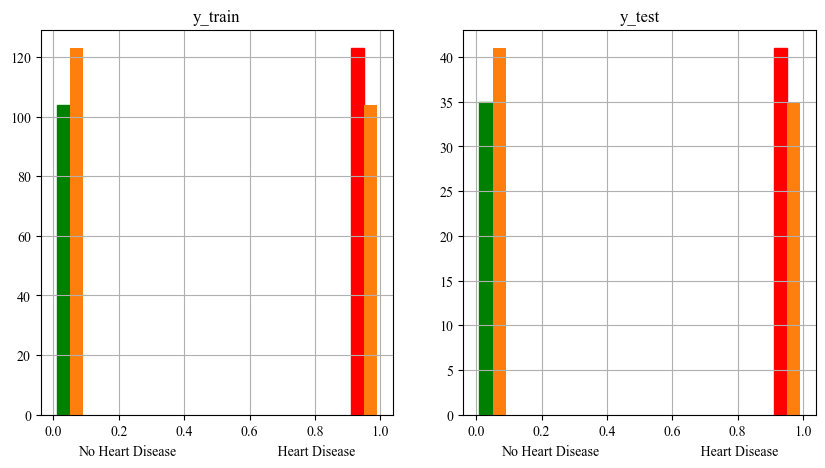

In [92]:
# check class distributions for label balance
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5))

# plot histograms
axs[0].set_xlabel('No Heart Disease                             Heart Disease')
axs[0].set_title('y_train')
axs[0].grid()
axs[0].hist(Y_train_net)
axs[0].get_children()[0].set_color('g')
axs[0].get_children()[9].set_color('r')
axs[1].set_title('y_test')
axs[1].set_xlabel('No Heart Disease                             Heart Disease')
axs[1].grid()
axs[1].hist(Y_test_net)
axs[1].get_children()[0].set_color('g')
axs[1].get_children()[9].set_color('r')
plt.show()

In [93]:
# set up the NN model, Dropout & L2 regularization 
import keras

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(9,), kernel_regularizer = regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               1

In [94]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])

In [96]:
# train the model
history = model.fit(X_train, Y_train_net,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


3/3 [==============================] - 0s 707us/step

Final test scores:

Test Loss: 0.6032052040100098
Test Accuracy: 0.7105262875556946
Test Precision: 0.7105262875556946
Test Recall: 0.7105262875556946


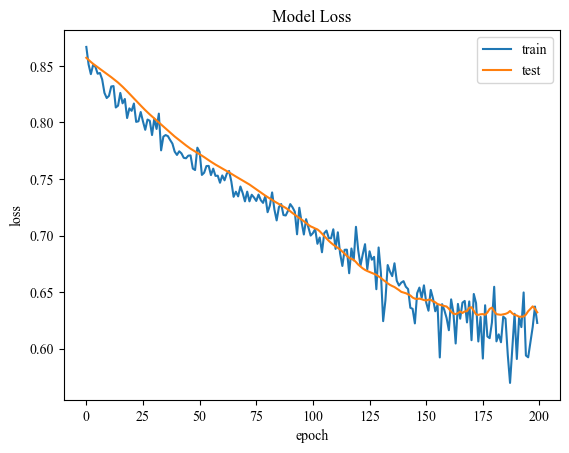

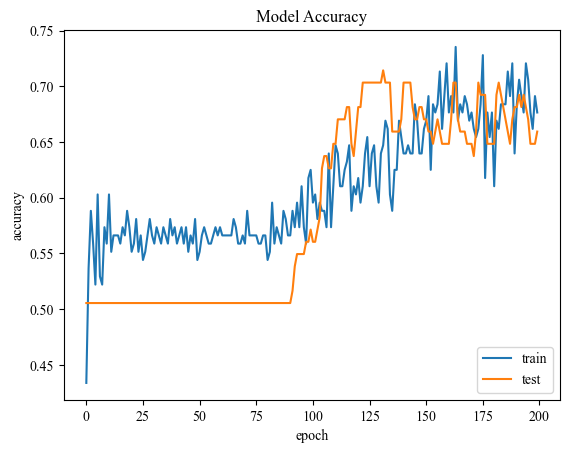

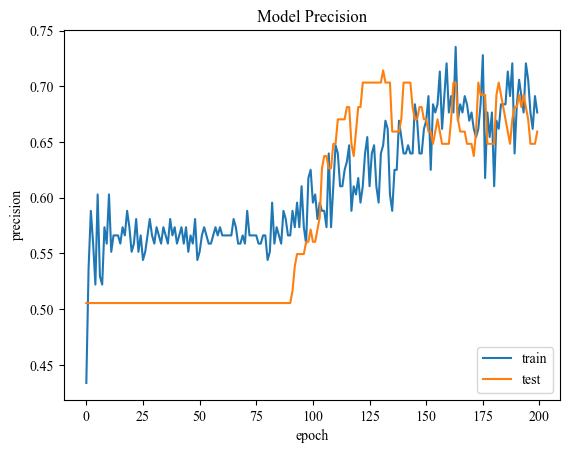

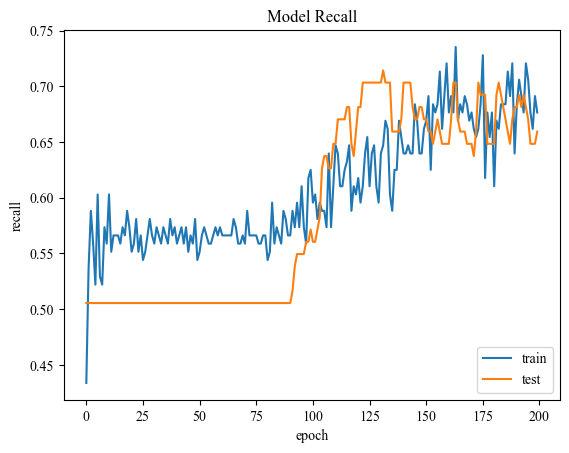

Text(0, 0.5, 'Score')

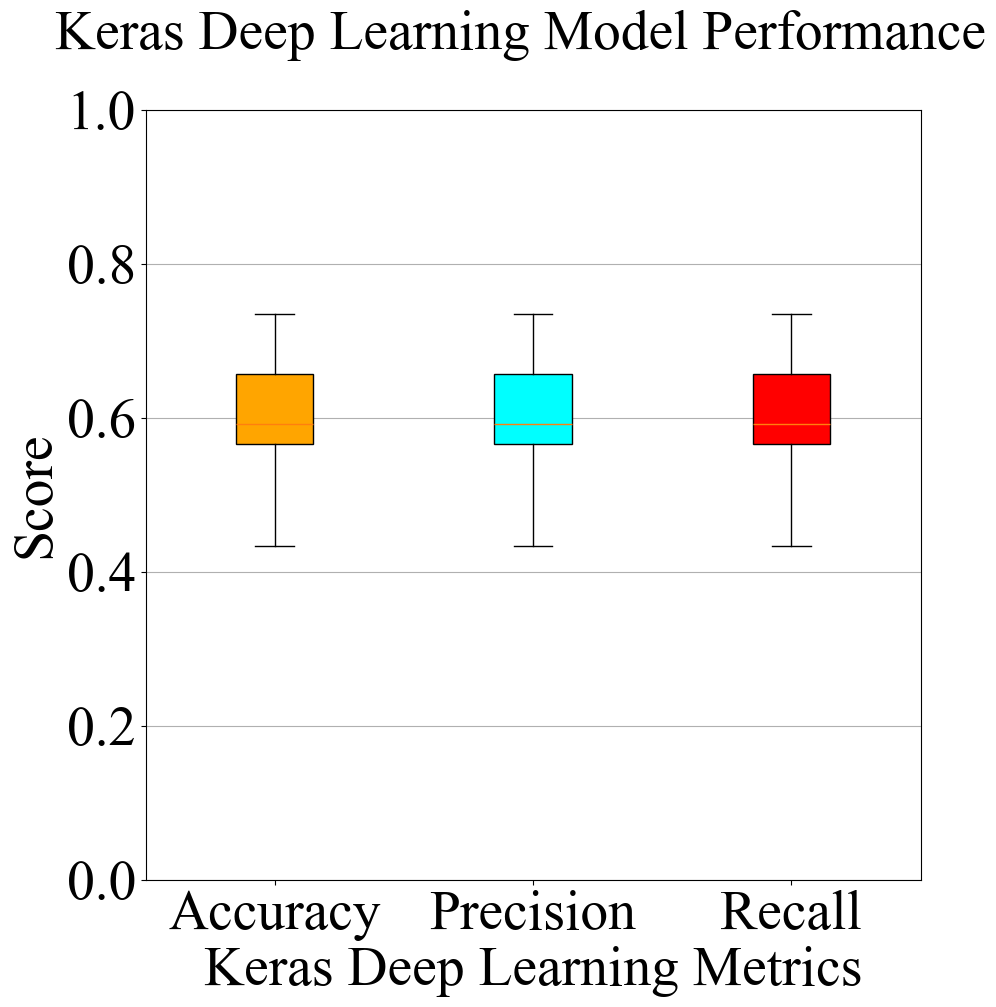

In [97]:
# make prediction for ROC
y_pred = model.predict(X_test)
y_pred = np.round(Y_test_net).astype(int)

score = model.evaluate(X_test, Y_test_net, verbose=VERBOSE)
print('\nFinal test scores:')
print('\nTest Loss:', score[0])
print('Test Accuracy:', score[1])
print('Test Precision:', score[2])
print('Test Recall:', score[3])

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


# plot boxplot accuracy, precision, recall
bplot = [history.history['accuracy'], history.history['precision'], history.history['recall']]
labels = ['Accuracy', 'Precision', 'Recall']

colors = ['orange', 'cyan', 'red']

fig = plt.figure(figsize=(10,10))
fig.suptitle('Keras Deep Learning Model Performance', fontsize=40)

a = fig.add_subplot(111)
a.tick_params(axis = 'both', which = 'major', labelsize = 40)
a.set_ylim(0,1)
bplot = a.boxplot(bplot, labels=labels,
                  vert=True, patch_artist=True)

# color the boxes
for bp in bplot:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
a.yaxis.grid(True)
a.set_xlabel('Keras Deep Learning Metrics',fontsize=40)
a.set_ylabel('Score',fontsize=40)

In [101]:
acc=np.mean(Y_test_net==y_pred)
print( acc)

1.0


In [102]:
y_ann = df['outcome'].values
y_ann = y_ann.reshape(y.shape[0],1)
x_ann = df.drop(['outcome'],axis=1)
minx = np.min(x_ann)
maxx = np.max(x_ann)
x_ann = (x_ann - minx) / (maxx - minx)
x_ann.head()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ekg,max_heart_rate,exercise_angina
0,0.111702,0.001773,0.001773,0.257092,0.413121,0.001773,0.003546,0.265957,0.000000
1,0.118794,0.001773,0.007092,0.283688,0.507092,0.000000,0.003546,0.191489,0.001773
2,0.118794,0.001773,0.007092,0.212766,0.406028,0.000000,0.003546,0.228723,0.001773
3,0.065603,0.001773,0.005319,0.230496,0.443262,0.000000,0.000000,0.331560,0.000000
4,0.072695,0.000000,0.003546,0.230496,0.361702,0.000000,0.003546,0.304965,0.000000


## Normal ANN

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_ann,y_ann,test_size = 0.2,random_state=0)

In [104]:
model = Sequential()
model.add(Dense(200, input_dim=9, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [105]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
output = model.fit(x_train, y_train,validation_split=0.2, epochs=500, batch_size=x_train.shape[0]//2)

Epoch 1/500
2/2 [==============================] - 0s 51ms/step - loss: 0.6955 - accuracy: 0.4767 - val_loss: 0.7547 - val_accuracy: 0.5714
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6882 - accuracy: 0.5544 - val_loss: 0.7541 - val_accuracy: 0.5714
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6815 - accuracy: 0.5699 - val_loss: 0.7538 - val_accuracy: 0.5714
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6749 - accuracy: 0.5959 - val_loss: 0.7545 - val_accuracy: 0.5714
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6693 - accuracy: 0.6114 - val_loss: 0.7546 - val_accuracy: 0.5714
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6639 - accuracy: 0.6114 - val_loss: 0.7531 - val_accuracy: 0.5714
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6585 - accuracy: 0.6373 - val_loss: 0.7512 - val_accuracy: 0.5714
Epoch 8/500
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.5630 - accuracy: 0.7047 - val_loss: 0.7141 - val_accuracy: 0.5714
Epoch 60/500
2/2 [==============================] - 0s 8ms/step - loss: 0.5503 - accuracy: 0.7358 - val_loss: 0.7129 - val_accuracy: 0.5714
Epoch 61/500
2/2 [==============================] - 0s 7ms/step - loss: 0.5509 - accuracy: 0.7358 - val_loss: 0.7108 - val_accuracy: 0.5714
Epoch 62/500
2/2 [==============================] - 0s 8ms/step - loss: 0.5498 - accuracy: 0.7409 - val_loss: 0.7090 - val_accuracy: 0.5714
Epoch 63/500
2/2 [==============================] - 0s 7ms/step - loss: 0.5500 - accuracy: 0.7409 - val_loss: 0.7068 - val_accuracy: 0.5714
Epoch 64/500
2/2 [==============================] - 0s 8ms/step - loss: 0.5492 - accuracy: 0.7409 - val_loss: 0.7050 - val_accuracy: 0.5714
Epoch 65/500
2/2 [==============================] - 0s 7ms/step - loss: 0.5540 - accuracy: 0.7358 - val_loss: 0.7036 - val_accuracy: 0.5714
Epoch 66/500
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.5358 - accuracy: 0.7513 - val_loss: 0.6611 - val_accuracy: 0.5714
Epoch 118/500
2/2 [==============================] - 0s 8ms/step - loss: 0.5351 - accuracy: 0.7565 - val_loss: 0.6603 - val_accuracy: 0.5714
Epoch 119/500
2/2 [==============================] - 0s 8ms/step - loss: 0.5326 - accuracy: 0.7565 - val_loss: 0.6594 - val_accuracy: 0.5714
Epoch 120/500
2/2 [==============================] - 0s 8ms/step - loss: 0.5346 - accuracy: 0.7772 - val_loss: 0.6588 - val_accuracy: 0.5714
Epoch 121/500
2/2 [==============================] - 0s 7ms/step - loss: 0.5311 - accuracy: 0.7565 - val_loss: 0.6577 - val_accuracy: 0.5714
Epoch 122/500
2/2 [==============================] - 0s 8ms/step - loss: 0.5280 - accuracy: 0.7668 - val_loss: 0.6566 - val_accuracy: 0.5714
Epoch 123/500
2/2 [==============================] - 0s 8ms/step - loss: 0.5332 - accuracy: 0.7513 - val_loss: 0.6557 - val_accuracy: 0.5714
Epoch 124/500
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.5082 - accuracy: 0.7668 - val_loss: 0.6333 - val_accuracy: 0.6939
Epoch 176/500
2/2 [==============================] - 0s 8ms/step - loss: 0.5092 - accuracy: 0.7668 - val_loss: 0.6325 - val_accuracy: 0.6939
Epoch 177/500
2/2 [==============================] - 0s 7ms/step - loss: 0.5086 - accuracy: 0.7720 - val_loss: 0.6320 - val_accuracy: 0.6939
Epoch 178/500
2/2 [==============================] - 0s 8ms/step - loss: 0.5080 - accuracy: 0.7668 - val_loss: 0.6313 - val_accuracy: 0.6939
Epoch 179/500
2/2 [==============================] - 0s 7ms/step - loss: 0.5087 - accuracy: 0.7617 - val_loss: 0.6307 - val_accuracy: 0.6939
Epoch 180/500
2/2 [==============================] - 0s 8ms/step - loss: 0.5048 - accuracy: 0.7720 - val_loss: 0.6300 - val_accuracy: 0.6735
Epoch 181/500
2/2 [==============================] - 0s 7ms/step - loss: 0.5052 - accuracy: 0.7720 - val_loss: 0.6292 - val_accuracy: 0.6735
Epoch 182/500
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.4750 - accuracy: 0.7617 - val_loss: 0.5957 - val_accuracy: 0.7551
Epoch 234/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4725 - accuracy: 0.7772 - val_loss: 0.5944 - val_accuracy: 0.7551
Epoch 235/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4746 - accuracy: 0.7720 - val_loss: 0.5931 - val_accuracy: 0.7755
Epoch 236/500
2/2 [==============================] - 0s 10ms/step - loss: 0.4766 - accuracy: 0.7772 - val_loss: 0.5917 - val_accuracy: 0.7755
Epoch 237/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4856 - accuracy: 0.7824 - val_loss: 0.5905 - val_accuracy: 0.7755
Epoch 238/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4772 - accuracy: 0.7668 - val_loss: 0.5896 - val_accuracy: 0.7755
Epoch 239/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4714 - accuracy: 0.7979 - val_loss: 0.5890 - val_accuracy: 0.7755
Epoch 240/500
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.4462 - accuracy: 0.8187 - val_loss: 0.5415 - val_accuracy: 0.7959
Epoch 292/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4458 - accuracy: 0.8135 - val_loss: 0.5412 - val_accuracy: 0.7755
Epoch 293/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4455 - accuracy: 0.8187 - val_loss: 0.5412 - val_accuracy: 0.7755
Epoch 294/500
2/2 [==============================] - 0s 9ms/step - loss: 0.4454 - accuracy: 0.8187 - val_loss: 0.5410 - val_accuracy: 0.7959
Epoch 295/500
2/2 [==============================] - 0s 9ms/step - loss: 0.4448 - accuracy: 0.7979 - val_loss: 0.5404 - val_accuracy: 0.7755
Epoch 296/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4462 - accuracy: 0.8083 - val_loss: 0.5406 - val_accuracy: 0.7551
Epoch 297/500
2/2 [==============================] - 0s 10ms/step - loss: 0.4440 - accuracy: 0.8135 - val_loss: 0.5419 - val_accuracy: 0.7347
Epoch 298/500
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.4304 - accuracy: 0.8238 - val_loss: 0.5249 - val_accuracy: 0.7143
Epoch 350/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4311 - accuracy: 0.8394 - val_loss: 0.5287 - val_accuracy: 0.6939
Epoch 351/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4345 - accuracy: 0.8135 - val_loss: 0.5376 - val_accuracy: 0.6735
Epoch 352/500
2/2 [==============================] - 0s 9ms/step - loss: 0.4198 - accuracy: 0.8394 - val_loss: 0.5433 - val_accuracy: 0.6531
Epoch 353/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4283 - accuracy: 0.8446 - val_loss: 0.5517 - val_accuracy: 0.6735
Epoch 354/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4328 - accuracy: 0.8394 - val_loss: 0.5540 - val_accuracy: 0.6735
Epoch 355/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4308 - accuracy: 0.8135 - val_loss: 0.5674 - val_accuracy: 0.6531
Epoch 356/500
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.4275 - accuracy: 0.8238 - val_loss: 1.0371 - val_accuracy: 0.5102
Epoch 408/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4236 - accuracy: 0.8187 - val_loss: 1.0320 - val_accuracy: 0.5102
Epoch 409/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4234 - accuracy: 0.8187 - val_loss: 1.0289 - val_accuracy: 0.5306
Epoch 410/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4229 - accuracy: 0.8187 - val_loss: 1.0512 - val_accuracy: 0.5102
Epoch 411/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4244 - accuracy: 0.8394 - val_loss: 1.0459 - val_accuracy: 0.5102
Epoch 412/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4214 - accuracy: 0.8290 - val_loss: 1.0222 - val_accuracy: 0.5306
Epoch 413/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4228 - accuracy: 0.8187 - val_loss: 0.9814 - val_accuracy: 0.5306
Epoch 414/500
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.4227 - accuracy: 0.8342 - val_loss: 1.1146 - val_accuracy: 0.5102
Epoch 466/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4232 - accuracy: 0.8342 - val_loss: 1.0042 - val_accuracy: 0.5306
Epoch 467/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4224 - accuracy: 0.8187 - val_loss: 0.9269 - val_accuracy: 0.5510
Epoch 468/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4151 - accuracy: 0.8238 - val_loss: 0.8921 - val_accuracy: 0.5714
Epoch 469/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4241 - accuracy: 0.8290 - val_loss: 0.8745 - val_accuracy: 0.5714
Epoch 470/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4316 - accuracy: 0.8083 - val_loss: 0.8557 - val_accuracy: 0.5714
Epoch 471/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4208 - accuracy: 0.8290 - val_loss: 0.8604 - val_accuracy: 0.5714
Epoch 472/500
2/2 [========

In [107]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 1ms/step - loss: 1.2384 - accuracy: 0.5082

accuracy: 50.82%


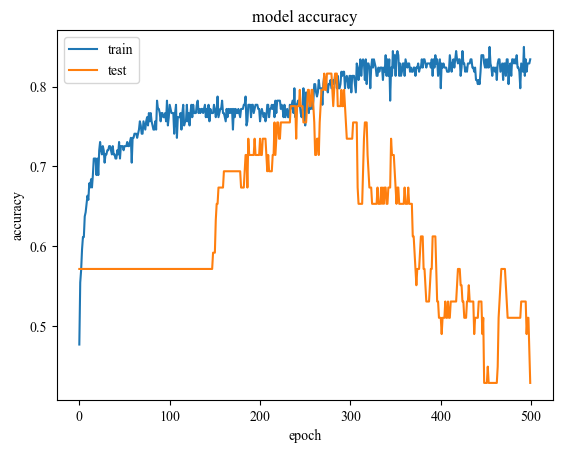

In [108]:
plt.plot(output.history['accuracy'])
plt.plot(output.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy.png',dpi=100)
plt.show()

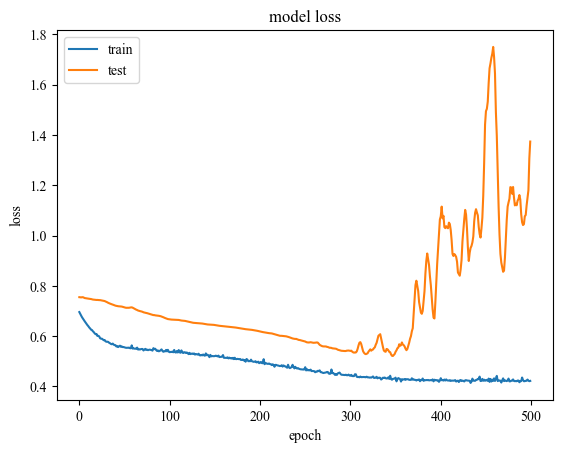

In [109]:
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss.png',dpi=100)
plt.show()